# **Análisis de solicitantes de préstamos**


# **Contexto y audiencia**

El siguiente análisis contiene información sobre solicitantes a préstamos, incluyendo atributos como el monto del préstamo, el tipo de préstamo, la edad, el nivel de educación, el estado civil, la cantidad de ingresos, entre otros.

Las entidades financieras que otorgan préstamos necesitan saber si un solicitante de préstamo tiene una alta probabilidad de incumplimiento para poder tomar decisiones informadas sobre si otorgar o no el préstamo. La información recopilada en este conjunto de datos, va a permitir evaluar el riesgo crediticio de un solicitante y, por lo tanto, tomar decisiones más informadas sobre la concesión de préstamos.

# **Hipótesis/ Preguntas de Interés**

1. ¿Cuántas personas tuvieron problemas con los primeros pagos del préstamo?
2. ¿Existe una relación entre el género de las personas y la probabilidad de tener problemas en el pago?
1. ¿Existe una relación entre la edad de las personas y la probabilidad de tener problemas en el pago?
1. ¿Existe una relación entre el nivel de educación máximo alcanzado de las personas y la probabilidad de tener problemas en el pago?

# **Análisis Exploratorio de Datos**

In [2]:
# Importando las librerías a utilizar
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
!pip install skimpy
from skimpy import skim

df = pd.read_csv ("https://media.githubusercontent.com/media/Rickozono/analisis_solicitudes_prestamos/main/loan_applicants.csv")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 152.8/152.8 kB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 21.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.9/121.9 kB 11.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 341.8/341.8 kB 24.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 34.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.9/84.9 kB 8.3 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 1.5.3
    Uninstalling pandas-1.5.3:
      Successfully uninstalled pandas-1.5.3
  Attempting uninstall: ipykernel
    Found existing installation: ipykernel 5.5.6
    Uninstalling ipykernel-5.5.6:
      Successfully uninstalled ipykernel-5.5.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 require

In [3]:
skim (df)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 307511 │ │ float64     │ 65    │                                                          │
│ │ Number of columns │ 122    │ │ int64       │ 41    │                                                          │
│ └───────────────────┴────────┘ │ string      │ 16    │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━┓  │
│ ┃ column_name   ┃ NA     ┃ NA %          ┃ mean    ┃ sd     ┃ p0      ┃ p25    ┃ p75    ┃ p100      ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━┩  │
│ │ SK_ID_CURR    │      0 │             0 │  280000 │ 100000 │  100000 │ 190000 │ 370000 │    460000 │ ██████ │  │
│ │ TARGET        │      0 │             0 │   0.081 │   0.27 │       0 │      0 │      0 │         1 │ █    ▁ │  │
│ │ CNT_CHILDREN  │      0 │             0 │    0.42 │   0.72 │       0 │      0 │      1 │        19 │   █    │  │
│ │ AMT_INCOME_TO │      0 │             0 │  170000 │ 240000 │   26000 │ 110000 │ 200000 │ 120000000 │   █    │  │
│ │ TAL           │        │               │         │        │         │        │        │           │        │  │
│ │ AMT_CREDIT    │      0 │             0 │  600000 │ 400000 │   45000 │ 270000 │ 810000 │   4000000 │   █▃   │  │
│ │ AMT_ANNUITY   │     12 │ 0.00390229942 │   27000 │  14000 │    1600 │  17000 │  35000 │    260000 │   █▁   │  │
│ │               │        │      99390914 │         │        │         │        │        │           │        │  │
│ │ AMT_GOODS_PRI │    278 │ 0.09040327012 │  540000 │ 370000 │   40000 │ 240000 │ 680000 │   4000000 │   █▂   │  │
│ │ CE            │        │        692229 │         │        │         │        │        │           │        │  │
│ │ REGION_POPULA │      0 │             0 │   0.021 │  0.014 │ 0.00029 │   0.01 │  0.029 │     0.073 │ █▇▇▁ ▁ │  │
│ │ TION_RELATIVE │        │               │         │        │         │        │        │           │        │  │
│ │ DAYS_BIRTH    │      0 │             0 │  -16000 │   4400 │  -25000 │ -20000 │ -12000 │     -7500 │ ▃▆▆█▇▄ │  │
│ │ DAYS_EMPLOYED │      0 │             0 │   64000 │ 140000 │  -18000 │  -2800 │   -290 │    370000 │ █    ▂ │  │
│ │ DAYS_REGISTRA │      0 │             0 │   -5000 │   3500 │  -25000 │  -7500 │  -2000 │         0 │   ▁▃▆█ │  │
│ │ TION          │        │               │         │        │         │        │        │           │        │  │
│ │ DAYS_ID_PUBLI │      0 │             0 │   -3000 │   1500 │   -7200 │  -4300 │  -1700 │         0 │  ▂█▅▄▄ │  │
│ │ SH            │        │               │         │        │         │        │        │           │        │  │
│ │ OWN_CAR_AGE   │ 202929 │ 65.9908100848 │      12 │     12 │       0 │      5 │     15 │        91 │   █▂   │  │
│ │               │        │           425 │         │        │         │        │        │           │        │  │
│ │ FLAG_MOBIL    │      0 │             0 │       1 │ 0.0018 │       0 │      1 │      1 │         1 │      █ │  │
│ │ FLAG_EMP_PHON │      0 │             0 │    0.82 │  

Del resumen realizado mediante skim, podemos destacar lo siguiente:

El dataset tiene 30.7511 registros y 122 columnas
De las 122 columnas:
65 son del tipo float64
41 son del tipo int64
16 son del tipo string
Nos brinda información sobre la cantidad de registros NA que tiene el dataset y el % que representan del total de la columna.
De los campos float64 e int64 obtuvimos los principales valores estadísiticos como media, desvío estandar y los percentiles 0, 25, 75 y 100.

Establecemos la columna "SK_ID_CURR" como índice, ya que nos validamos que no tiene valores nulos.

In [4]:
df.set_index('SK_ID_CURR', inplace=True)
df.head

<bound method NDFrame.head of             TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
SK_ID_CURR                                                       
100002           1         Cash loans           M            N   
100003           0         Cash loans           F            N   
100004           0    Revolving loans           M            Y   
100006           0         Cash loans           F            N   
100007           0         Cash loans           M            N   
...            ...                ...         ...          ...   
456251           0         Cash loans           M            N   
456252           0         Cash loans           F            N   
456253           0         Cash loans           F            N   
456254           1         Cash loans           F            N   
456255           0         Cash loans           F            N   

           FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
SK_ID_CURR                           

Las variables que considero que son importantes para el modelo son:

SK_ID_CURR: ID del préstamo. Que pasó a ser el índice del dataset

TARGET: Variable objetivo: 1 - cliente con dificultades de pago: se atrasó más de X días en al menos una de las primeras Y cuotas del préstamo de nuestra muestra, 0 - resto de casos

NAME_CONTRACT_TYPE: Identificación si el préstamo es en efectivo o revolvente

CODE_GENDER: Genero del cliente

FLAG_OWN_CAR: Marcar si el cliente posee un coche

FLAG_OWN_REALTY: Marcar si el cliente posee una casa o piso

CNT_CHILDREN: Número de hijos que tiene el cliente

AMT_INCOME_TOTAL: Ingresos del cliente

AMT_CREDIT: Monto del crédito del préstamo

AMT_ANNUITY: Anualidad de préstamo

AMT_GOODS_PRICE: Para préstamos de consumo es el precio de los bienes por los cuales se otorga el préstamo.

NAME_INCOME_TYPE: Tipo de ingreso de los clientes

NAME_EDUCATION_TYPE: Nivel de educación más alto que alcanzó el cliente

NAME_FAMILY_STATUS: estado civil del cliente

NAME_HOUSING_TYPE: Cuál es la situación de vivienda del cliente

DAYS_BIRTH: cantidad de días en relación al día de la solicitud. A partir de este campo se puede calcular la edad, multiplicando por -1 y dividiendo por 365. Se va a crear otra columnna llamada 'AGE' con dicho cálculo, para ser tenida en cuenta para el análisis.

DAYS_EMPLOYED: cuántos días antes de la aplicación la persona empezó su empleo actual. Mismo razonamiento que para 'DAYS_BIRTH', se creará una columna con los años que el solicitante lleva trabajando ('YEARS_EMPLOYED')

ORGANIZATION_TYPE: Tipo de organización en la que trabaja el solicitante
El resto de las variables como por ejemplo FLAG_DOCUMENT_2 (si la persona entregó el documento 2), considero que hacen ruido y perjudican para el análisis del dataset y no son relevantes para el modelo.

De las variables relevantes AMT_ANNUITY y AMT_GOODS_PRICE tienen valores NA, sin embargo son solo 12 y 280 registros respectivamente, de un total de 307511.

In [5]:
# Calculamos la edad a partir del campo 'DAYS BIRTH',
# porque es más entendible la edad en años que en cantidad de días
# y por último cambiamos el tipo de dato a entero
# Hacemos el mismo procedimiento con 'DAYS_EMPLOYED'
# para obtener los años trabajados, si el número es negativo, está desempleado
df['AGE'] = (df['DAYS_BIRTH'] / -365).astype(int)
df['YEARS_EMPLOYED'] = (df['DAYS_EMPLOYED'] / -365).astype(int)

In [6]:
# Filtramos el dataset por las variables relevantes mencionadas anteriormente
df = df[['TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'AGE', 'YEARS_EMPLOYED', 'ORGANIZATION_TYPE']]
df

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,AGE,YEARS_EMPLOYED,ORGANIZATION_TYPE
SK_ID_CURR,,,,,,,,,,,,,,,,,
100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Working,Secondary / secondary special,Single / not married,House / apartment,25,1,Business Entity Type 3
100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,State servant,Higher education,Married,House / apartment,45,3,School
100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Working,Secondary / secondary special,Single / not married,House / apartment,52,0,Government
100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,52,8,Business Entity Type 3
100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Working,Secondary / secondary special,Single / not married,House / apartment,54,8,Religion
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,225000.0,Working,Secondary / secondary special,Separated,With parents,25,0,Services
456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,225000.0,Pensioner,Secondary / secondary special,Widow,House / apartment,56,-1000,XNA
456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,585000.0,Working,Higher education,Separated,House / apartment,41,21,School


De las variables relevantes AMT_ANNUITY y AMT_GOODS_PRICE tienen valores NA, sin embargo son solo 12 y 280 registros respectivamente, de un total de 307511.

Para solucionar este problema, esta vez remplazaremos esos valores por la mediana.

Elijo la mediana porque es menos sensible a valores outliers.

In [7]:
# Reemplazar los valores NaN por la mediana
df_filled = df.fillna(df.median())
# Chequeamos la información reemplazada en el nuevo dataframe y confirmamos que ya no hay más NA
skim (df_filled)

<ipython-input-7-fed39c74b6d0>:2: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_filled = df.fillna(df.median())


╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 307511 │ │ string      │ 9     │                                                          │
│ │ Number of columns │ 17     │ │ int64       │ 4     │                                                          │
│ └───────────────────┴────────┘ │ float64     │ 4     │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━┳━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━┓  │
│ ┃ column_name         ┃ NA  ┃ NA %  ┃ mean     ┃ sd      ┃ p0     ┃ p25     ┃ p75     ┃ p100        ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━╇━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━┩  │
│ │ TARGET              │   0 │     0 │    0.081 │    0.27 │      0 │       0 │       0 │           1 │ █    ▁ │  │
│ │ CNT_CHILDREN        │   0 │     0 │     0.42 │    0.72 │      0 │       0 │       1 │          19 │   █    │  │
│ │ AMT_INCOME_TOTAL    │   0 │     0 │   170000 │  240000 │  26000 │  110000 │  200000 │   120000000 │   █    │  │
│ │ AMT_CREDIT          │   0 │     0 │   600000 │  400000 │  45000 │  270000 │  810000 │     4000000 │   █▃   │  │
│ │ AMT_ANNUITY         │   0 │     0 │    27000 │   14000 │   1600 │   17000 │   35000 │      260000 │   █▁   │  │
│ │ AMT_GOODS_PRICE     │   0 │     0 │   540000 │  370000 │  40000 │  240000 │  680000 │     4000000 │   █▂   │  │
│ │ AGE                 │   0 │     0 │       43 │      12 │     20 │      34 │      53 │          69 │ ▄▇█▆▆▃ │  │
│ │ YEARS_EMPLOYED      │   0 │     0 │     -180 │     390 │  -1000 │       0 │       7 │          49 │ ▂    █ │  │
│ └─────────────────────┴─────┴───────┴──────────┴─────────┴────────┴─────────┴─────────┴─────────────┴────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name                          ┃ NA    ┃ NA %      ┃ words per row            ┃ total words          ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ NAME_CONTRACT_TYPE                   │     0 │         0 │                        2 │               615022 │  │
│ │ CODE_GENDER                          │     0 │         0 │                        2 │               615022 │  │
│ │ FLAG_OWN_CAR                         │     0 │         0 │                        2 │               615022 │  │
│ │ FLAG_OWN_REALTY                      │     0 │         0 │                        2 │               615022 │  │
│ │ NAME_INCOME_TYPE                     │     0 │         0 │                        2 │               615022 │  │
│ │ NAME_EDUCATION_TYPE                  │     0 │         0 │                        2 │               615022 │  │
│ │ NAME_FAMILY_STATUS                   │     0 │         0 │                        2 │               615022 │  │
│ │ NAME_HOUSING_TYPE                    │     0 │         0 │                        2 │               615022 │  │
│ │ ORGANIZATION_TYPE                    │     0 │      

La variable target es la que nos indica si el solicitante tuvo o no problemas para con el pago del préstamo. (0 = 'No tuvo problemas en los pagos; 1 = tuvo problemas en los primeros pagos del préstamo)

¿Cuál es la distribución de la variable objetivo 'TARGET' en el dataset?

Para responder a esta pregunta, podemos utilizar un gráfico de barras para visualizar la cantidad de clientes con dificultades de pago (1) frente a aquellos sin dificultades de pago (0).

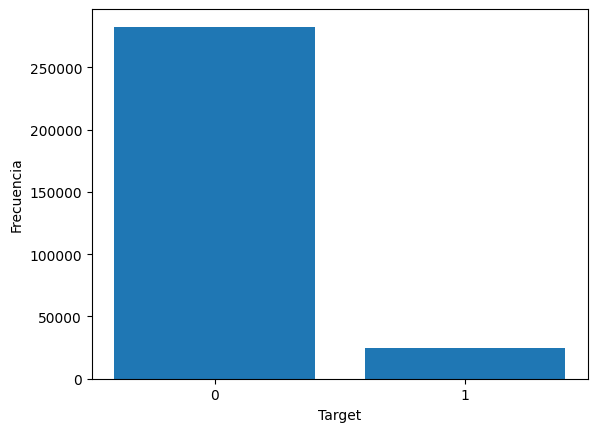

In [8]:
plt.bar(df_filled['TARGET'].value_counts().index,
        df_filled['TARGET'].value_counts().values)
plt.xlabel('Target')
plt.ylabel('Frecuencia')
plt.xticks(df['TARGET'].unique())
plt.show()

Esta visualización nos mostrará la proporción de clientes que tuvieron dificultades de pago en comparación con aquellos cuyos pagos se realizaron a tiempo.
Podemos ver que el dataset está muy desbalanceado ya que la gran mayoría de los clientes no tiene problemas en los primeros pagos del préstamo, ya que la variable 0 tiene 282686 registros (casi 92%), y la variable 1 sólo 24825 (8%)

Para indagar un poco más en el dataset nos preguntamos si existe alguna relación entre el género de los solicitantes y la variable objetivo.

Para explorar esta pregunta, podemos utilizar un gráfico de barras apiladas que muestre la distribución de los clientes según su género y el estado de pago.

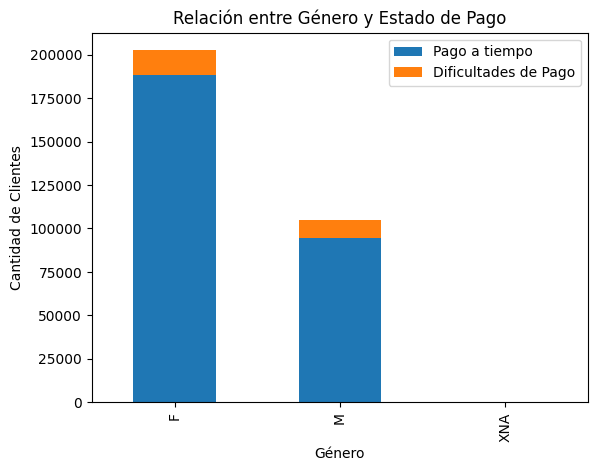

In [ ]:
# Crear una tabla cruzada entre el género y la variable objetivo
gender_target_crosstab = pd.crosstab(df_filled['CODE_GENDER'], df_filled['TARGET'])

# Crear el gráfico de barras apiladas
gender_target_crosstab.plot(kind='bar', stacked=True)
plt.xlabel('Género')
plt.ylabel('Cantidad de Clientes')
plt.title('Relación entre Género y Estado de Pago')
plt.legend(['Pago a tiempo', 'Dificultades de Pago'])
plt.show()

Basándonos en el gráfico de barras apiladas que muestra la relación entre el género de los solicitantes y la variable objetivo, podemos observar que hay más mujeres solicitando préstamos que hombres.
La proporción de clientes con dificultades de pago (variable objetivo igual a 1) es ligeramente mayor en mujeres en comparación con hombres.
Sin embargo no podemos afirmar de manera concluyente que el género sea un predictor fuerte de las dificultades de pago en los préstamos.

Otra de las variables que podemos analizar en base de la variable TARGET, es la edad de los solicitantes, y ver si se puede identificar alguna relación.

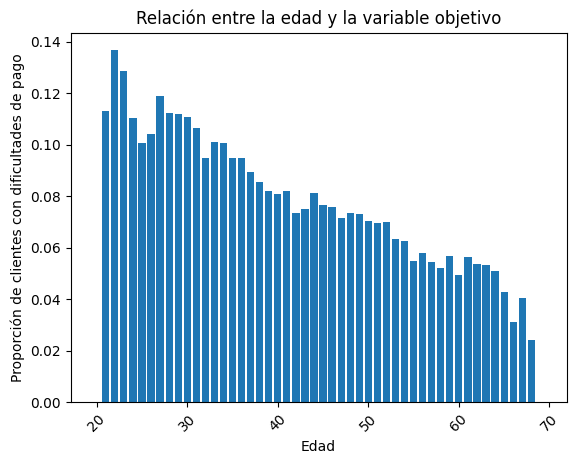

In [9]:
# Agrupar los datos por grupos de edad y calcular la proporción de clientes con dificultades de pago en cada grupo
age_groups = df_filled.groupby('AGE')['TARGET'].mean()

# Crear el gráfico de barras
plt.bar(age_groups.index, age_groups.values)
plt.xlabel('Edad')
plt.ylabel('Proporción de clientes con dificultades de pago')
plt.title('Relación entre la edad y la variable objetivo')
plt.xticks(rotation=45)
plt.show()

Al analizar la relación entre la edad de los solicitantes y la variable objetivo, podemos observar que existe una distribución amplia de la edad de los solicitantes de préstamos, que se extiende desde los 20 hasta los 70 años aproximadamente.
La proporción de clientes con dificultades de pago (variable objetivo igual a 1) parece ser más alta en los grupos de edad más jóvenes, especialmente entre los 20 y los 30 años.
A medida que aumenta la edad, la proporción de clientes con dificultades de pago tiende a disminuir gradualmente, aunque no es lineal ya que existen algunas fluctuaciones en las proporciones en ciertos grupos de edad.

Otra de las variables a analizar es el nivel de estudios de los solicitantes. Se podría suponer que a menores niveles de educación alcanzados, hay más probabilidad de que el solicitante tenga problemas para pagarlo.

TARGET                                 0          1
NAME_EDUCATION_TYPE                                
Academic degree                98.170732   1.829268
Higher education               94.644885   5.355115
Incomplete higher              91.515034   8.484966
Lower secondary                89.072327  10.927673
Secondary / secondary special  91.060071   8.939929
------------------------------------------------------------------------------------


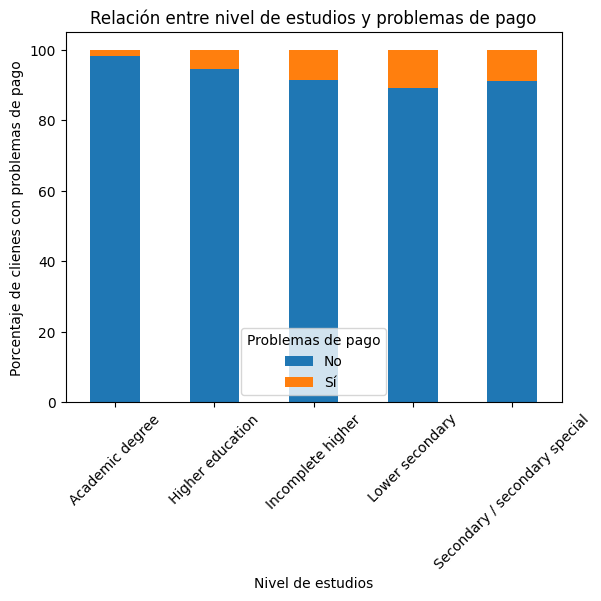

In [ ]:
# Crear una tabla entre el nivel de estudios y la variable target
tabla = pd.crosstab(df_filled['NAME_EDUCATION_TYPE'], df_filled['TARGET'], normalize='index')*100
print(tabla)
print('------------------------------------------------------------------------------------')
# Crear un gráfico de barras para visualizar la tabla
tabla.plot(kind='bar', stacked=True)

# Configuración del gráfico
plt.title('Relación entre nivel de estudios y problemas de pago')
plt.xlabel('Nivel de estudios')
plt.xticks(rotation=45)
plt.ylabel('Porcentaje de clienes con problemas de pago')
plt.legend(title='Problemas de pago', labels=['No', 'Sí'])
plt.show()

Podemos observar que el nivel de estudio con mayor porcentaje de problemas de pago es el "Lower secondary" podría estar relacionado a que a menor nivel de estudio se tenga un menor ingreso y por lo tanto problemas para pagar el préstamo.

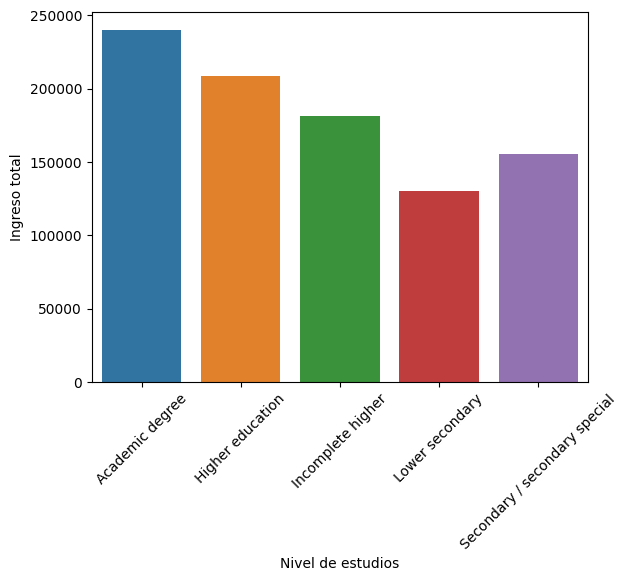

In [10]:
# Agrupar por nivel de estudios y calcular el ingreso promedio
income_by_education = df_filled.groupby('NAME_EDUCATION_TYPE')['AMT_INCOME_TOTAL'].mean().reset_index()

# Crear gráfico de barras
sns.barplot(x='NAME_EDUCATION_TYPE', y='AMT_INCOME_TOTAL', data=income_by_education)
plt.xticks(rotation=45)
plt.xlabel('Nivel de estudios')
plt.ylabel('Ingreso total')
plt.show()

Como suponíamos un menor nivel de estudios ("Lower secondary") tiene un menor ingreso promedio.
Caso contrario los usuarios con un "Academic degree" tienen los ingresos promedios más altos, como era de esperarse.
Lo que justificaría por qué a mayor nivel de educación alcanzado, se tienen menores porcentajes de problemas de pago.

# **Insights y Recomendaciones**

Si bien podemos observar que hay más mujeres solicitando préstamos que hombres, no podemos afirmar de manera concluyente que el género sea un predictor fuerte de las dificultades de pago en los préstamos.



A medida que aumenta la edad, la proporción de clientes con dificultades de pago tiende a disminuir gradualmente, aunque no es lineal ya que existen algunas fluctuaciones en las proporciones en ciertos grupos de edad.




El nivel de estudio con mayor porcentaje de problemas de pago es el "Lower secondary".
Pudimos observar que al mismo tiempo es el nivel de estudio con menores ingresos y a medida que el nivel de educación máximo alcanzado es mayor, los ingresos aumentan.
Esta podría ser una de las razones por las cuales el nivel de educación más bajo tiene un porcentaje mayor de problemas de pago.

# **Alogritmo**

Al tener una variable target binaria (0 para identificar personas que no tuvieron problemas con los primeros pagos del préstamo y 1 para personas que sí tuvieron problemas) opté por un algoritmo de clasificación, el de regresión logística.
Sólo van a ser tenidas en cuenta las variables numéricas.

In [11]:
# Separamos las variables numéricas del dataset
df_num = df_filled.select_dtypes(include='number')
df_num

,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,AGE,YEARS_EMPLOYED
SK_ID_CURR,,,,,,,,
100002,1,0,202500.0,406597.5,24700.5,351000.0,25,1
100003,0,0,270000.0,1293502.5,35698.5,1129500.0,45,3
100004,0,0,67500.0,135000.0,6750.0,135000.0,52,0
100006,0,0,135000.0,312682.5,29686.5,297000.0,52,8
100007,0,0,121500.0,513000.0,21865.5,513000.0,54,8
...,...,...,...,...,...,...,...,...
456251,0,0,157500.0,254700.0,27558.0,225000.0,25,0
456252,0,0,72000.0,269550.0,12001.5,225000.0,56,-1000
456253,0,0,153000.0,677664.0,29979.0,585000.0,41,21


In [12]:
# Primero divido los datos en características (X) y variable objetivo (y)
X = df_num.drop('TARGET', axis=1)
y = df_num['TARGET']

print (X)
print (y)

            CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
SK_ID_CURR                                                            
100002                 0          202500.0    406597.5      24700.5   
100003                 0          270000.0   1293502.5      35698.5   
100004                 0           67500.0    135000.0       6750.0   
100006                 0          135000.0    312682.5      29686.5   
100007                 0          121500.0    513000.0      21865.5   
...                  ...               ...         ...          ...   
456251                 0          157500.0    254700.0      27558.0   
456252                 0           72000.0    269550.0      12001.5   
456253                 0          153000.0    677664.0      29979.0   
456254                 0          171000.0    370107.0      20205.0   
456255                 0          157500.0    675000.0      49117.5   

            AMT_GOODS_PRICE  AGE  YEARS_EMPLOYED  
SK_ID_CURR               

In [13]:
# Importo librerías para realizar el modelo
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [14]:
# Separacion train/test
X_train, X_test, y_train, y_test = train_test_split(X, y)

# Crear el modelo de regresión logística
model = LogisticRegression()

# Ajustar el modelo
model.fit(X_train, y_train)

#Predicciones
predicciones = model.predict(X_test)
predicciones

array([0, 0, 0, ..., 0, 0, 0])

Luego de realizar la separación entre train y test, crear el modelo de regresión logística, ajustar el modelo y realizar las predicciones.

Vemos en la matriz de confusión, que al tener un dataset tan desequilibrado (donde más del 90% de los registros tienen como variable target 0), el modelo no se pudo desarrollar completamente, ya que sólo predijo valores 0.

Con las métricas de rendimiento obtenidos mediante classification_report, podemos observar que se obtuvo una precisión del 92%, recall 100% y F1 Score 96% pero solo para predecir el target = 0.

Cuando hablamos de precisión nos referimos a es la proporción de muestras clasificadas correctamente como positivas entre todas las muestras clasificadas como positivas. Recall es la proporción de muestras positivas correctamente clasificadas entre todas las muestras verdaderamente positivas. F1 Score es la media armónica de precisión y recall, proporciona una medida única que combina ambas métricas.Support es la cantidad de muestras verdaderas de cada clase en el conjunto de prueba.

El gran desequilibrio del dataset también se ve reflejado en la matriz de confusión, ya que vemos que no se predijeron valores cuyo TARGET sea 1. Se predijeron bien 71000 registros y 6200 fueron identifiados como 0 cuando en realidad eran 1.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.92      1.00      0.96     70632
           1       0.00      0.00      0.00      6246

    accuracy                           0.92     76878
   macro avg       0.46      0.50      0.48     76878
weighted avg       0.84      0.92      0.88     76878



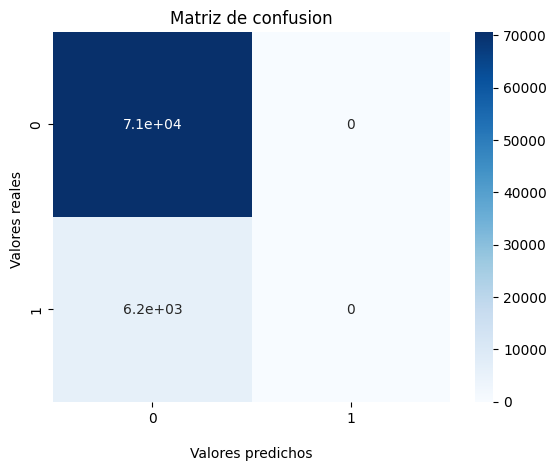

In [15]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
# Evaluar el rendimiento del modelo
print(classification_report(y_test, predicciones))
#Matriz de confusion
cf_matrix = confusion_matrix(y_test, predicciones)
import seaborn as sns
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')
ax.set_title('Matriz de confusion');
ax.set_xlabel('\nValores predichos')
ax.set_ylabel('Valores reales ');
## Labels
ax.xaxis.set_ticklabels(['0','1'])
ax.yaxis.set_ticklabels(['0','1'])
plt.show()